# 1. Préliminaires

# 1.1 Imports des librairies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1.2  Chargement des données

In [2]:
df = pd.read_csv("./data/mystery.csv")
df.head()

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


# 2. Graphiques

## 2.1 Cercle des corrélations

In [3]:
def graphic_correlation(x_y, pca:PCA,features:list):

    # les axess
    x, y = x_y

    # initialisation de la figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # iteration sur chaque feature
    for i in range(0, len(features)):
        # (x,y) = (0,0) origine comme début de chaque flêche
        plt.arrow(
            x=0,
            y=0,
            dx=pca.components_[x, i],
            dy=pca.components_[y, i],
            head_width=0.04,
            head_length=0.04,
            width=0.02,
        )
        plt.text(
            x=pca.components_[x, i] + 0.05,
            y=pca.components_[y, i] + 0.05,
            s=features[i]
        )

    # Traçage des axes
    plt.plot([-1,1],[0,0],color="grey",alpha=0.8,ls="--")
    plt.plot([0, 0], [-1, 1], color="grey", alpha=0.8, ls="--")

    # Nommage des axes avec leur pourcentage de variance captée
    v1,v2 = [f"{pca.explained_variance_ratio_[k]:.1%}%" for k in [x,y]]
    plt.xlabel(f"F{x+1} {v1}")
    plt.ylabel(f"F{y+1} {v2}")

    # Cercle
    theta = np.linspace(0,2*np.pi,100)
    plt.plot(np.cos(theta),np.sin(theta))
    plt.axis('equal')

    # titre
    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")

    # Affichage du graphique
    plt.show()

## 2.1 Plan Factoriel

In [4]:
def display_factorial_planes(x_y,
    X_projected , pca=None , labels=None , marker=".",figsize=[10,8],clusters=None,alpha=1
):
    # transformation de X en array numpy
    X_ = np.array(X_projected)

    # verification des input
    figsize= figsize or (8,8)
    labels = [] if labels is None else labels
    if not len(x_y)==2:
        raise AttributeError("2 axes sont requis")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("Les valeurs des axes ne sont pas bonnes")
    c = None if clusters is None else clusters

    # Déclaration de x et y
    x,y=x_y

    # Initialisation de la figure
    fig,ax = plt.subplots(figsize=figsize)

    # On dessine les points
    sns.scatterplot(x=X_[:,x],y=X_[:,y],hue=c)

    # Les limites des axes
    x_max = np.abs(X_[:,x]).max()*1.1
    y_max = np.abs(X_[:,y]).max()*1.1
    plt.xlim(left=-x_max,right=x_max)
    plt.ylim(bottom=-y_max,top=y_max)

    # Dessin des axes
    plt.plot([-x_max,x_max],[0,0],color="grey",alpha=alpha,ls='--')
    plt.plot([0, 0],[-y_max, y_max] ,color="grey", alpha=alpha, ls="--")

    # Affichage du noms des axes avec le pourcentage de variance cumulée

    if pca:
        v1, v2 = [f"{pca.explained_variance_ratio_[k]:.1%}%" for k in [x, y]]
    else:
        v1,v2=''
    plt.xlabel(f"F{x+1} {v1}")
    plt.ylabel(f"F{y+1} {v2}")

    # Affichage des labels de chaque point
    # for i,(x_,y_) in enumerate(X_[:,[x,y]]):
    #     plt.text(x_,y_+0.05,labels[i],fontsize='14',ha='center',va='center')

    # Titre et affichage
    plt.title(f"Projection sur F{x+1} et F{y+1}")
    plt.show()

# 3. Preparation des données

## 3.1 Tour rapide

In [5]:
df.head()

,0,1,2
0,-7.988979,15.633928,-5.726221
1,0.108386,-3.456144,22.272791
2,1.565447,10.915797,29.040207
3,0.765086,35.831929,20.892023
4,-8.880745,20.989331,8.337199


In [6]:
df.shape

(5000, 3)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


In [8]:
df.describe()

,0,1,2
count,5000.000000,5000.000000,5000.000000
mean,-1.435869,13.987612,14.640661
std,5.206094,17.666334,9.329521
min,-11.222926,-29.753165,-8.943011
25%,-5.886956,-1.595890,8.535664
50%,-1.351116,16.628227,15.998955
75%,3.143237,27.312951,21.854507
max,8.485872,44.376445,30.373069


In [9]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(190)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.nunique()

0    4810
1    4810
2    4810
dtype: int64

# 3. ACP


## 3.1 Standarisation
<!-- Ici pas besoin de réduire.Les données sont déjà dans la même unité -->

In [13]:
# scaler = StandardScaler(with_std=False)
scaler = StandardScaler()

In [14]:
X = df.copy()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).describe().round().loc[["mean", "std"]]

,0,1,2
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0


# 3.2 ACP
On va travailler sur 3 composantes

In [15]:
n_components = 3

In [16]:
pca = PCA(n_components=n_components)

pca.fit(X=X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",3
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized SVD 

## 3.3 Variance expliquée et éboulis des valeurs propres

In [17]:
pca.explained_variance_ratio_

array([0.50180671, 0.33609358, 0.16209971])

Ici la première composante capte 74.95% de la variance et les deux premieres captent ensemble 94.95% de la variance.

In [18]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([50.18, 33.61, 16.21])

In [19]:
scree_cum = np.cumsum(scree).round()
scree_cum

array([ 50.,  84., 100.])

In [20]:
# listes des composantes
x_list = [str(i+1) for i in range(n_components)]
x_list

['1', '2', '3']

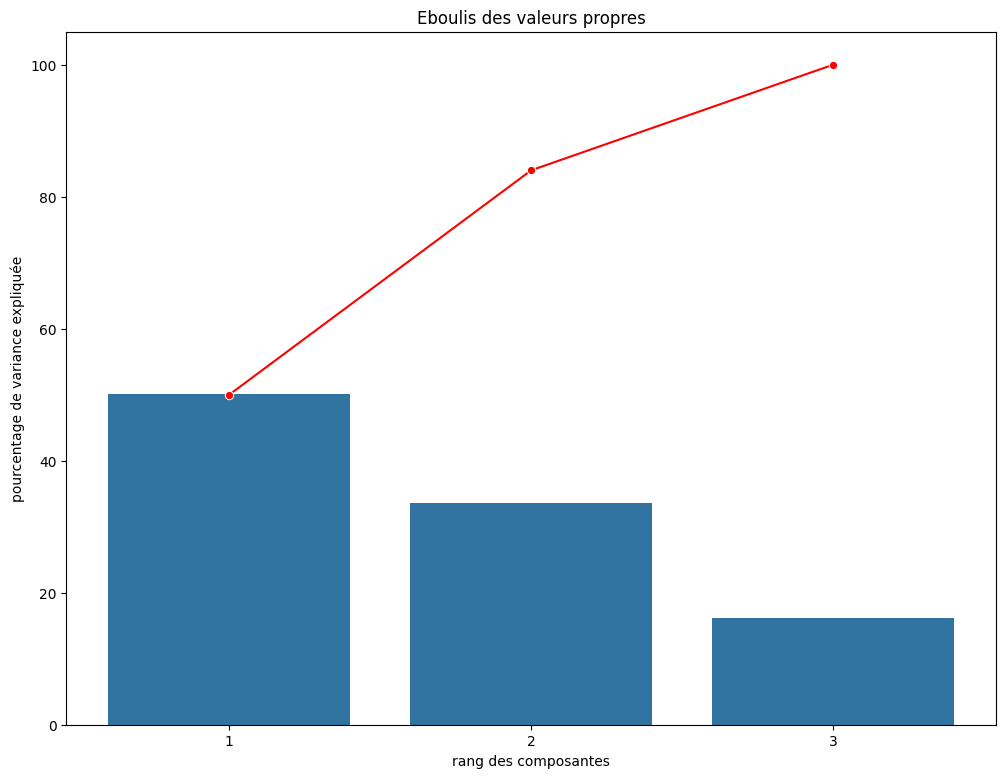

In [21]:
plt.figure(figsize=(12,9))
sns.barplot(x=x_list,y=scree)
sns.lineplot(x=x_list,y=scree_cum,color="red",marker="o")
plt.xlabel("rang des composantes")
plt.ylabel("pourcentage de variance expliquée")
plt.title("Eboulis des valeurs propres")
plt.show()

## 3.4 Composantes

In [22]:
pcs = pca.components_
pcs

array([[ 0.70844306, -0.70465109,  0.03968963],
       [ 0.06510681,  0.12124646,  0.99048493],
       [ 0.70275851,  0.69911811, -0.1317738 ]])

In [23]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2
0,0.708443,-0.704651,0.039690
1,0.065107,0.121246,0.990485
2,0.702759,0.699118,-0.131774


In [24]:
pcs.columns = df.columns
pcs.index= [f"F{i}" for i in x_list]
pcs.round(2)


,0,1,2
F1,0.71,-0.70,0.04
F2,0.07,0.12,0.99
F3,0.70,0.70,-0.13


`F1 = (-0.16  * 0 ) + (0.99 *1) + (0.02 * 2)`

`F2 = (0.06  * 0 ) + (-0.01 *1) + (1.00 * 2)`

`F3 = (0.99  * 0 ) + (0.16 *1) + (-0.06 * 2)`

In [25]:
pcs.T

,F1,F2,F3
0,0.708443,0.065107,0.702759
1,-0.704651,0.121246,0.699118
2,0.039690,0.990485,-0.131774


# 3.5 Graphe de correlation

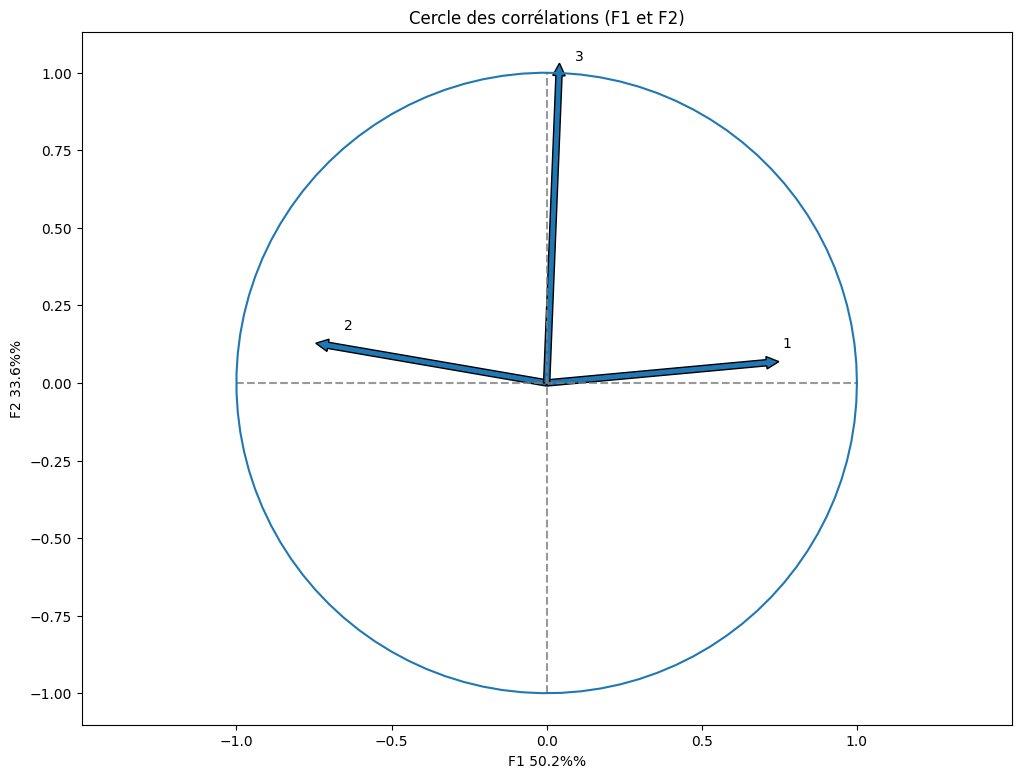

In [26]:
x_y=(0,1)
graphic_correlation(x_y=x_y,pca=pca,features=x_list)

# 3.6 Projection

In [27]:
X_projected = pca.transform(X_scaled)

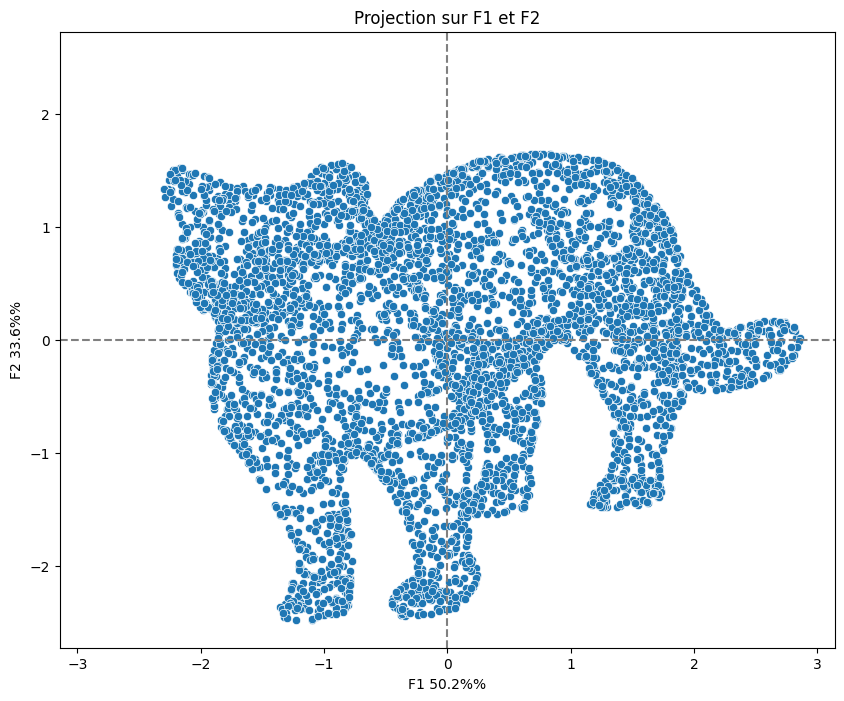

In [28]:
x_y=(0,1)
display_factorial_planes(
    x_y=x_y,
    pca=pca,
    X_projected=X_projected
)

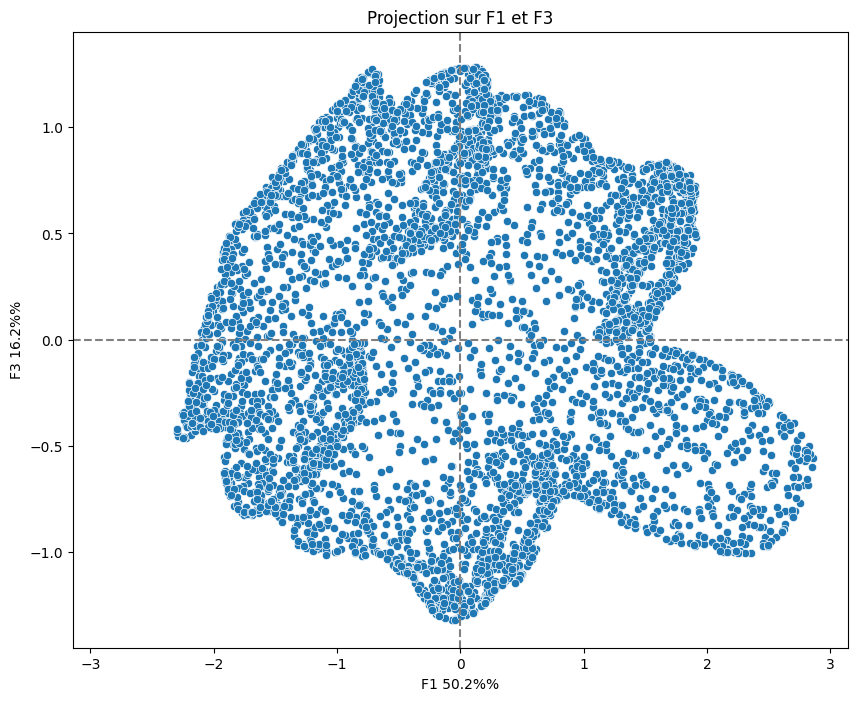

In [29]:
x_y = (0, 2)
display_factorial_planes(x_y=x_y, pca=pca, X_projected=X_projected)

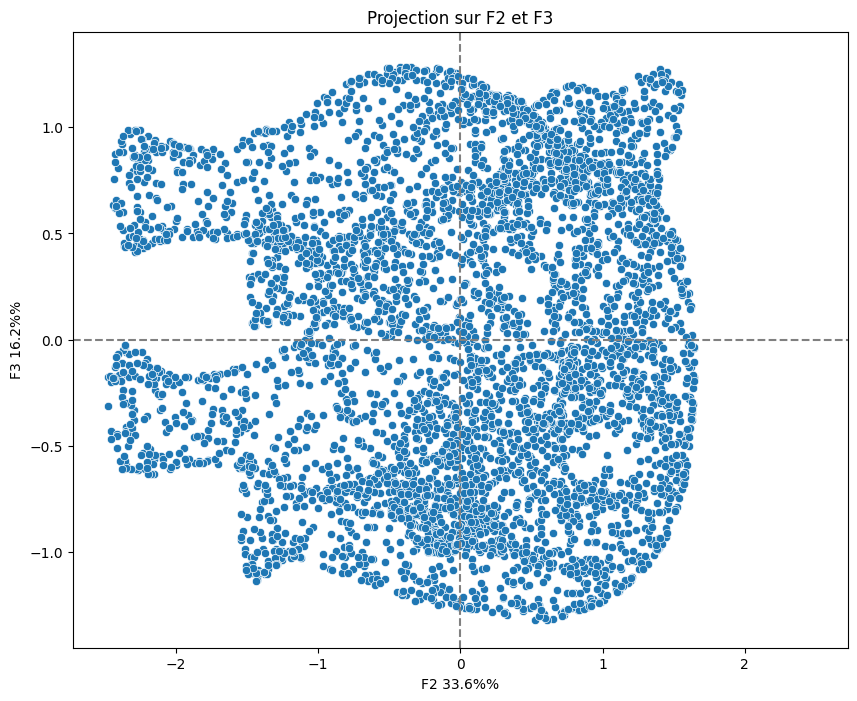

In [30]:
x_y = (1, 2)
display_factorial_planes(x_y=x_y, pca=pca, X_projected=X_projected)

# 3.7 Bonus

In [31]:
bonus_df = df.copy()
bonus_df.columns=['x','y','z']
fig = px.scatter_3d(bonus_df, x="x", y="y", z="z", opacity=0.3)
fig.show()